# **Weekly Project**
The goal for this week’s project is to build and train a regression model on the Capital Bike Share (Washington, D.C.) Kaggle data set, in order to predict demand for bicycle rentals at any given hour, based on time and weather, e.g.:
“Given the forecasted weather conditions, how many bicycles can we expect to be rented out (city-wide) this Saturday at 2pm?”


*  split the data into a training and test set
*   conduct an exploratory data analysis
*   train a regression model
* iteratively optimize the model by expanding or selecting 
features
* regularize the model to avoid overfitting
* calculate a RMSLE for the training and test set
* upload your code to GitHub













In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('train.csv', index_col=0, parse_dates=True)
df.head()

season  holiday  workingday  ...  casual  registered  count
datetime                                          ...                           
2011-01-01 00:00:00       1        0           0  ...       3          13     16
2011-01-01 01:00:00       1        0           0  ...       8          32     40
2011-01-01 02:00:00       1        0           0  ...       5          27     32
2011-01-01 03:00:00       1        0           0  ...       3          10     13
2011-01-01 04:00:00       1        0           0  ...       0           1      1

[5 rows x 11 columns]

In [3]:
df.tail()

season  holiday  workingday  ...  casual  registered  count
datetime                                          ...                           
2012-12-19 19:00:00       4        0           1  ...       7         329    336
2012-12-19 20:00:00       4        0           1  ...      10         231    241
2012-12-19 21:00:00       4        0           1  ...       4         164    168
2012-12-19 22:00:00       4        0           1  ...      12         117    129
2012-12-19 23:00:00       4        0           1  ...       4          84     88

[5 rows x 11 columns]

In [4]:
df.index.resolution

'hour'

In [5]:
df.describe()

season       holiday  ...    registered         count
count  10886.000000  10886.000000  ...  10886.000000  10886.000000
mean       2.506614      0.028569  ...    155.552177    191.574132
std        1.116174      0.166599  ...    151.039033    181.144454
min        1.000000      0.000000  ...      0.000000      1.000000
25%        2.000000      0.000000  ...     36.000000     42.000000
50%        3.000000      0.000000  ...    118.000000    145.000000
75%        4.000000      0.000000  ...    222.000000    284.000000
max        4.000000      1.000000  ...    886.000000    977.000000

[8 rows x 11 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


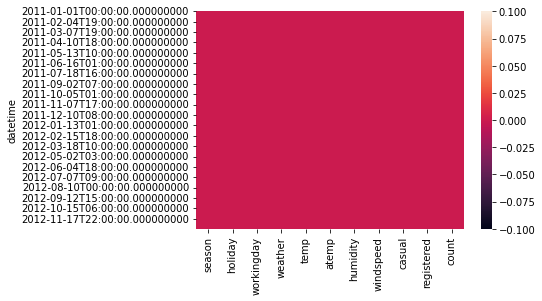

In [7]:
sns.heatmap(df.isna())

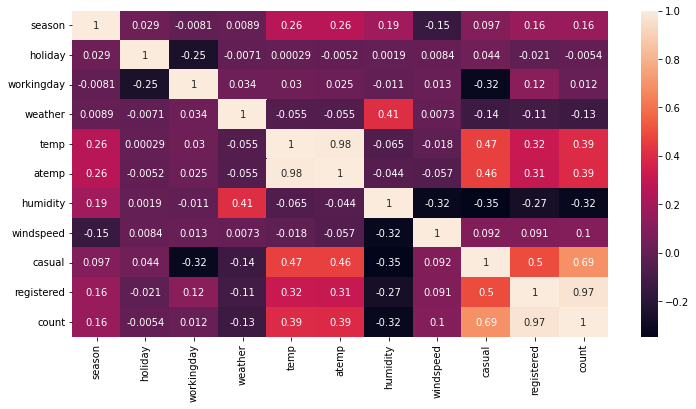

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)

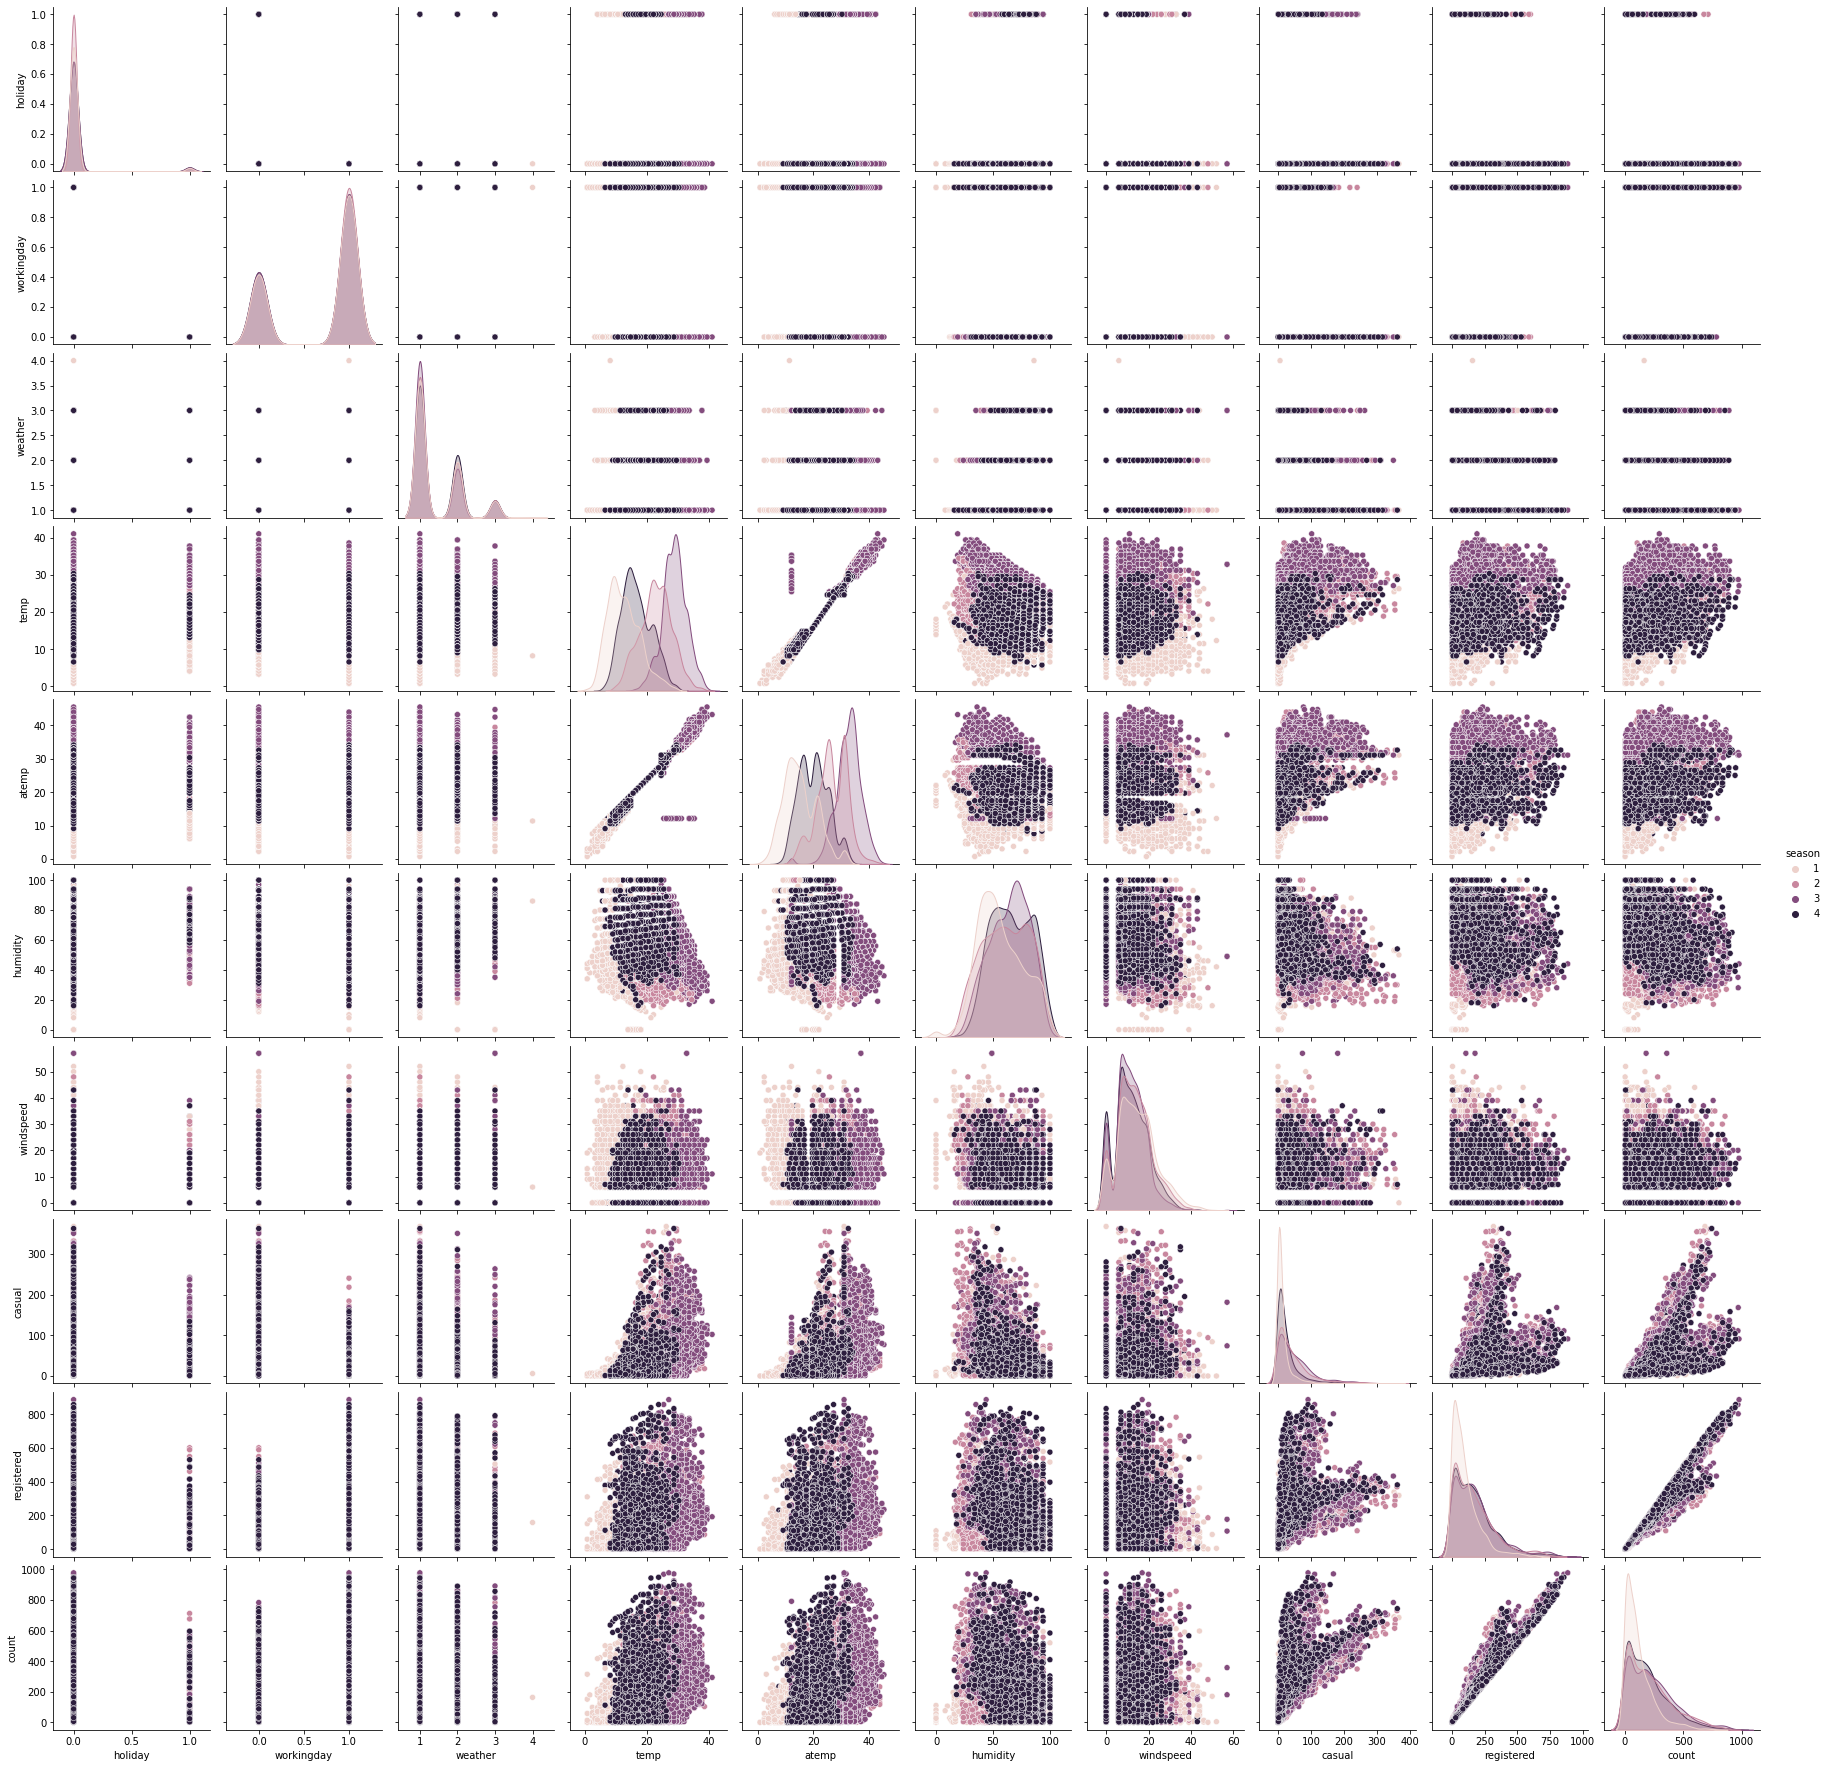

In [ ]:
#to save run time
#sns.pairplot(df, hue='season')

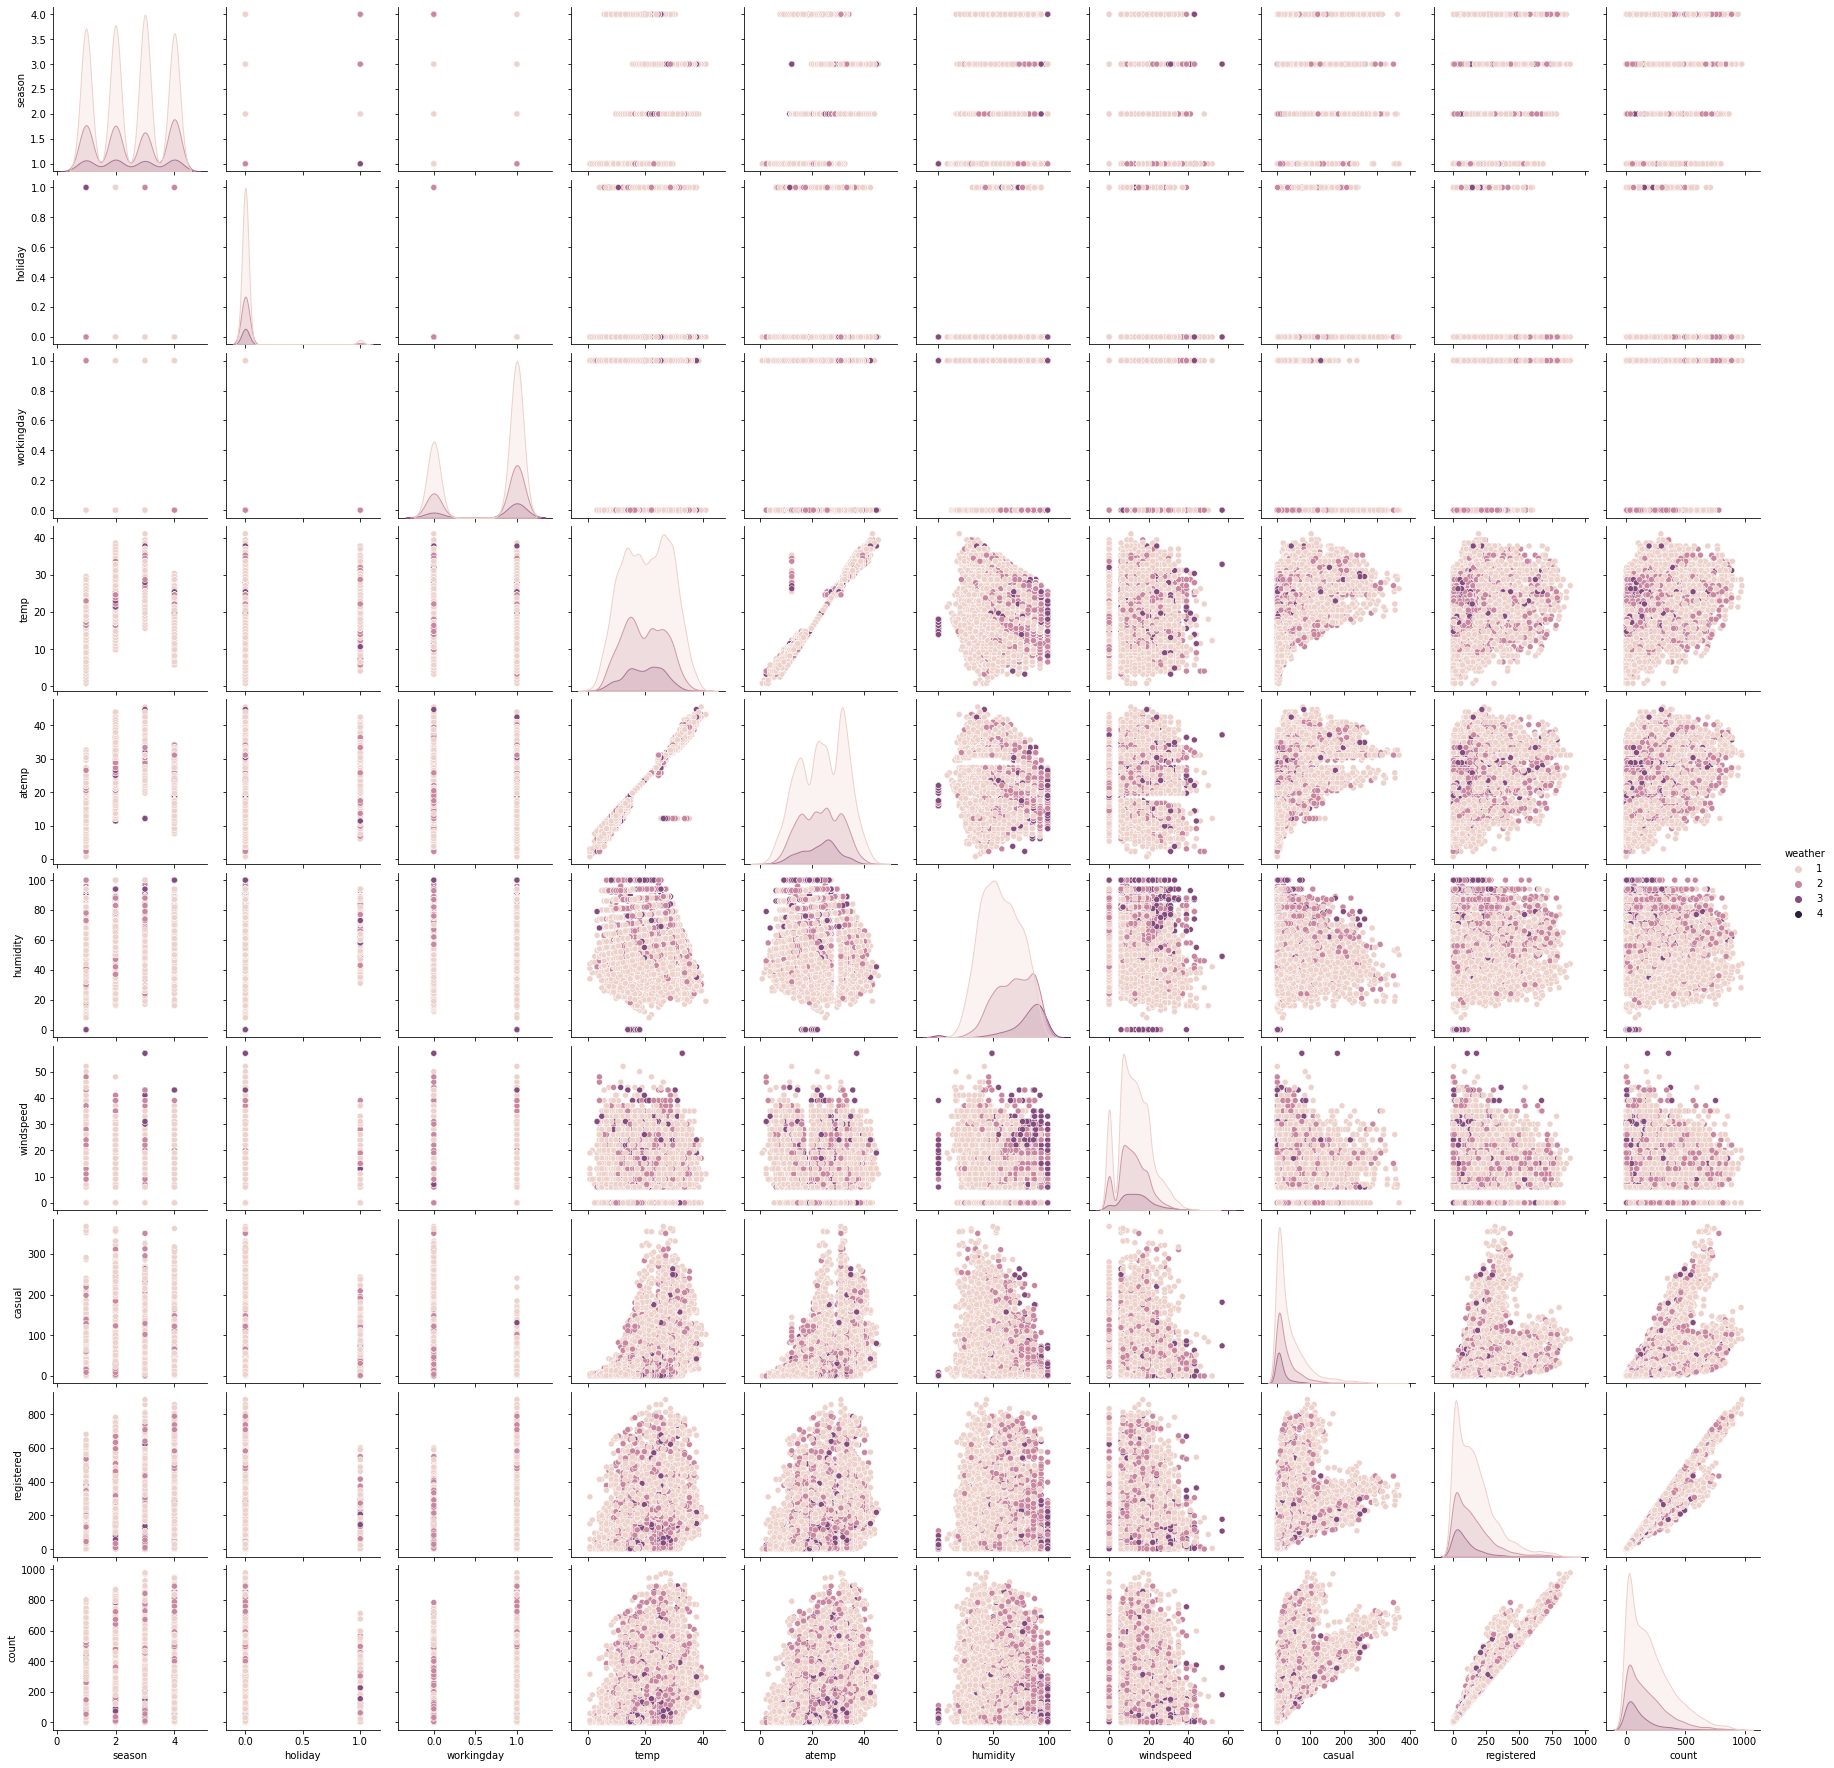

In [ ]:
#to save run time
#sns.pairplot(df, hue='weather')

# **downsample to days**

In [14]:
downsampled = df.resample('D').mean()
downsampled.head()

season  holiday  workingday  ...     casual  registered      count
datetime                                 ...                                  
2011-01-01     1.0      0.0         0.0  ...  13.791667   27.250000  41.041667
2011-01-02     1.0      0.0         0.0  ...   5.695652   29.130435  34.826087
2011-01-03     1.0      0.0         1.0  ...   5.454545   55.863636  61.318182
2011-01-04     1.0      0.0         1.0  ...   4.695652   63.217391  67.913043
2011-01-05     1.0      0.0         1.0  ...   3.565217   66.000000  69.565217

[5 rows x 11 columns]

In [15]:
downsampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719 entries, 2011-01-01 to 2012-12-19
Freq: D
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      456 non-null    float64
 1   holiday     456 non-null    float64
 2   workingday  456 non-null    float64
 3   weather     456 non-null    float64
 4   temp        456 non-null    float64
 5   atemp       456 non-null    float64
 6   humidity    456 non-null    float64
 7   windspeed   456 non-null    float64
 8   casual      456 non-null    float64
 9   registered  456 non-null    float64
 10  count       456 non-null    float64
dtypes: float64(11)
memory usage: 67.4 KB


In [16]:
downsampled.describe()

season     holiday  workingday  ...      casual  registered       count
count  456.000000  456.000000  456.000000  ...  456.000000  456.000000  456.000000
mean     2.500000    0.028509    0.682018  ...   35.881829  155.140707  191.022535
std      1.119262    0.166604    0.466204  ...   29.109049   61.877290   77.397273
min      1.000000    0.000000    0.000000  ...    0.750000   21.347826   26.304348
25%      1.750000    0.000000    0.000000  ...   13.250000  112.333333  138.291667
50%      2.500000    0.000000    1.000000  ...   30.083333  154.500000  191.062500
75%      3.250000    0.000000    1.000000  ...   47.572917  201.552083  250.072917
max      4.000000    1.000000    1.000000  ...  142.083333  287.958333  363.083333

[8 rows x 11 columns]

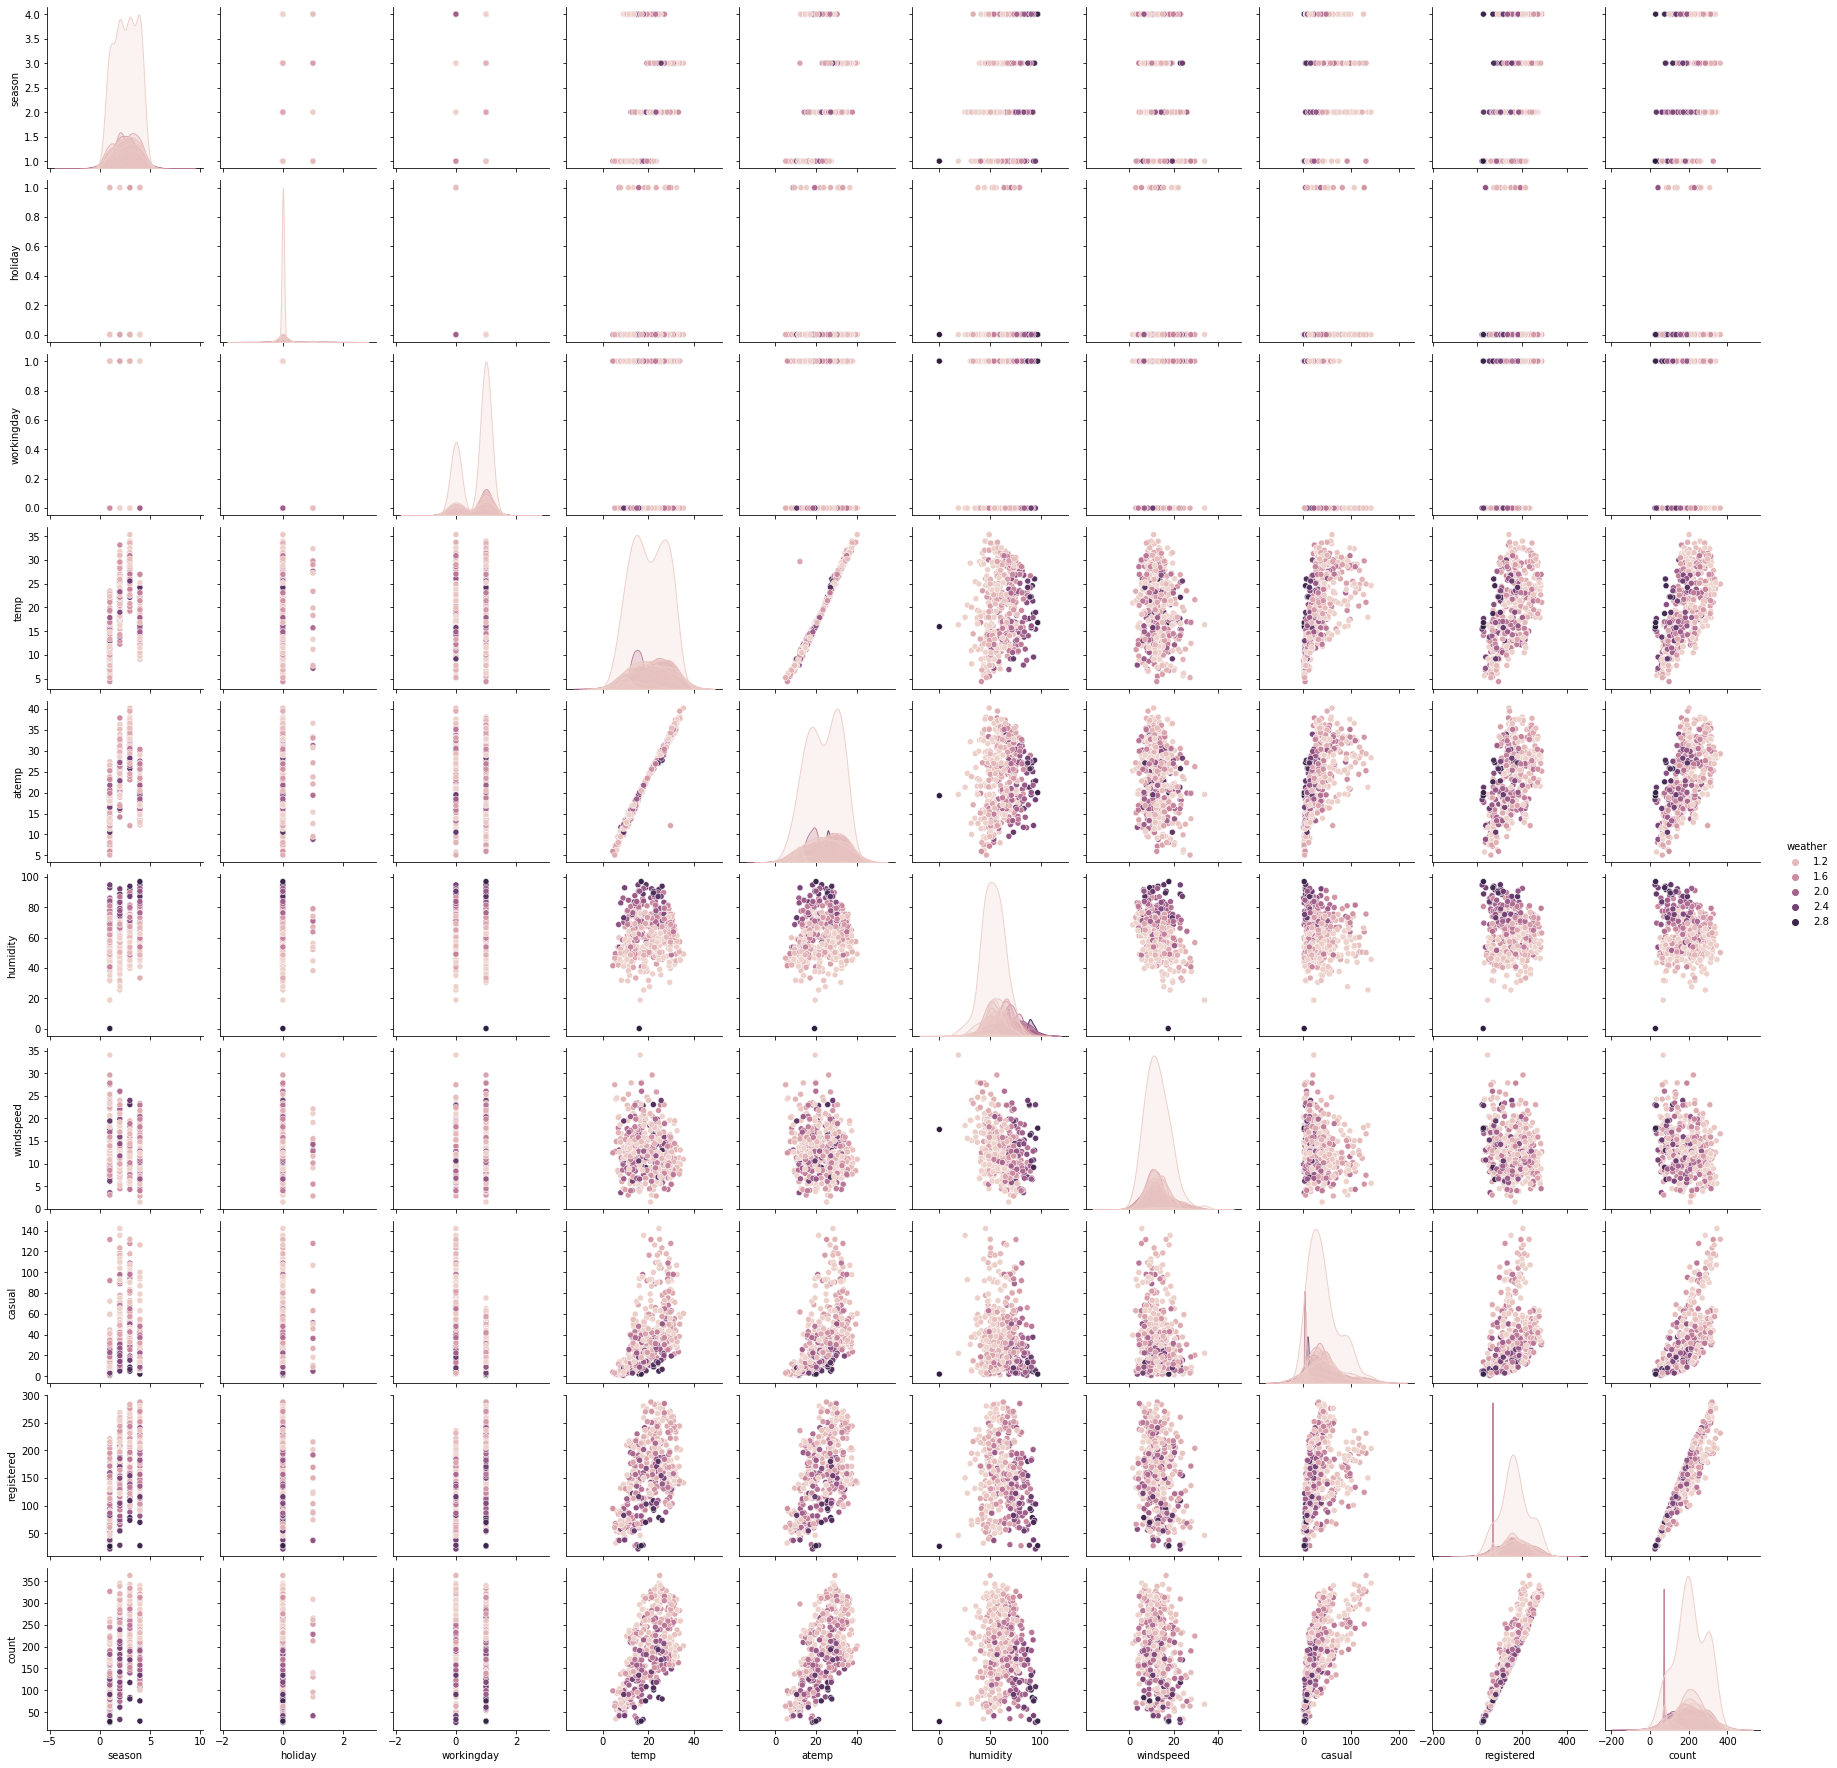

In [18]:
sns.pairplot(downsampled, hue='weather')

**Split train test**

In [ ]:
y=downsampled['count']
X=downsampled.drop('count', axis=1)
X.head()

season  holiday  workingday  ...  windspeed     casual  registered
datetime                                 ...                                  
2011-01-01     1.0      0.0         0.0  ...  10.749871  13.791667   27.250000
2011-01-02     1.0      0.0         0.0  ...  16.652122   5.695652   29.130435
2011-01-03     1.0      0.0         1.0  ...  16.636709   5.454545   55.863636
2011-01-04     1.0      0.0         1.0  ...  10.739809   4.695652   63.217391
2011-01-05     1.0      0.0         1.0  ...  12.522300   3.565217   66.000000

[5 rows x 10 columns]

In [ ]:
X_train, X_test, y_train, y_test=split_train_test(X,y)